In [2]:
from pymoo.factory import get_visualization, get_reference_directions
from pymoo.factory import get_performance_indicator
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib widget

0.0
0.1019102131883999
0.18389974300182033
0.24394973510860601
0.2805815594085902
0.2928932188134524
0.2805815594085902
0.243949735108606
0.18389974300182033
0.10191021318839996
4.3297802811774664e-17
NEXT:
0.0
0.0737620282564828
0.15038614452599655
0.22136990969871181
0.2734738945043726
0.29289321881345237
0.2734738945043726
0.22136990969871184
0.15038614452599647
0.07376202825648279
0.0


/var/folders/29/6lrl9x8116gbhpm7v2lsh0lh0000gn/T/ipykernel_10989/2593277704.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax.plot(np.cos(theta), np.sin(theta), 'ok', color='red')


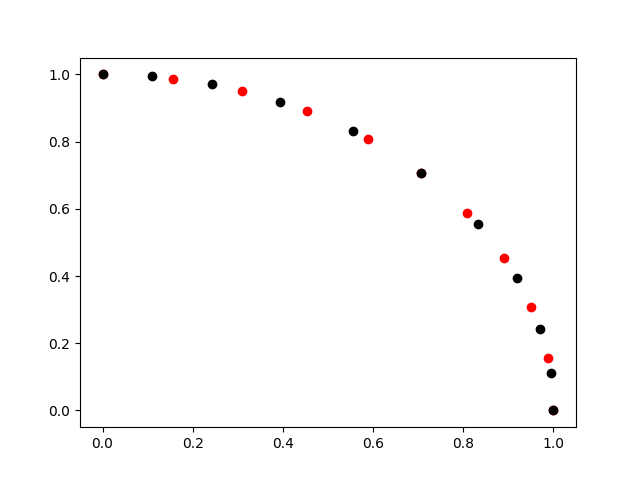

In [71]:
fig,ax=plt.subplots(nrows=1,ncols=1)
# ax[0].axis('equal')
# ax[1].axis('equal')
# ax[2].axis('equal')
# ax[2].set_xlim([0,1])
# ax[2].set_ylim([0,1])
# fig,axes = plt.subplots(ncols=1,nrows=1,subplot_kw=dict(projection='3d'))
def circle_dis(pt1x, pt1y, pt2x, pt2y):
    arc_line_len = ((pt1x - pt2x)**2 + (pt1y - pt2y)**2)**(1/2)
    angle = 2 * np.arcsin((arc_line_len / 2) / 1)
    arc_length = (2 * np.pi * 1) * (angle / 360)
    return arc_length
def eluc_dis(pt1x, pt1y, pt2x, pt2y):
	return ((pt1x-pt2x)**2 + (pt2y-pt1y)**2)**(1/2)
lastx = -1
lasty = -1

theta = np.linspace(0, np.pi / 2, 11)
ax.plot(np.cos(theta), np.sin(theta), 'ok', color='red')

Xs = np.cos(theta)
Ys = np.sin(theta)

for i in range(len(theta)):
	p1 = np.array([0,1])
	p2 = np.array([1,0])
	p3 = np.array([np.cos(theta[i]), np.sin(theta[i])])
	d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
	print(d)
print("NEXT:")
# for i in range(12):
# 	if(lastx != -1):
# 		print(circle_dis(lastx,lasty,Xs[i], Ys[i]))	
		
# 	lastx = Xs[i]
# 	lasty = Ys[i]

for i in range(0,11,1):
	# ax[0].plot(i/10, i/10, 'ok')
	x = i/10
	y = 1 - x
	
	sx = x**(1/2)
	sy = y**(1/2)

	S = (x**2+y**2)**(1/2)

	SXc = x / S
	SYc = y / S

	# if(lastx != -1):
		# print(eluc_dis(SXc,SYc,lastx,lasty ))
	# if(lastx != -1):
	# 	print(circle_dis(SXc,SYc,lastx,lasty ))

	lastx = SXc
	lasty = SYc



	ax.plot(SXc, SYc, 'ok')
	p1 = np.array([0,1])
	p2 = np.array([1,0])
	p3 = np.array([SXc, SYc])
	d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
	print(d)


	# ax[1].plot(x**(1/2), y**(1/2), 'ok')

plt.show()

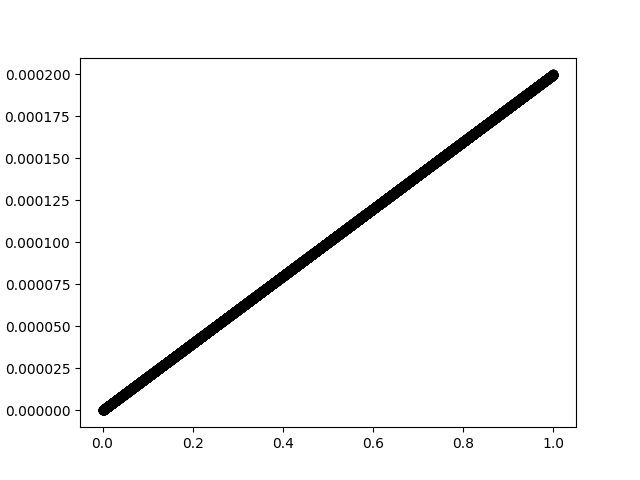

In [68]:
fig,ax = plt.subplots(1,1)


steps = np.linspace(0, 1, 10000)
last = 0
for i in range(len(steps)):
	v = steps[i] * steps[i]
	dis = v - last
	last = v
	ax.plot(steps[i], dis, 'ok')
	


5
Hypervolume: 46.837 %
[[0.54566207 0.19175723 0.2625807 ]
 [0.07562455 0.51589474 0.4084807 ]
 [0.23100703 0.33468491 0.43430806]
 [0.45514267 0.28786854 0.25698879]
 [0.03734649 0.95737818 0.00527533]]


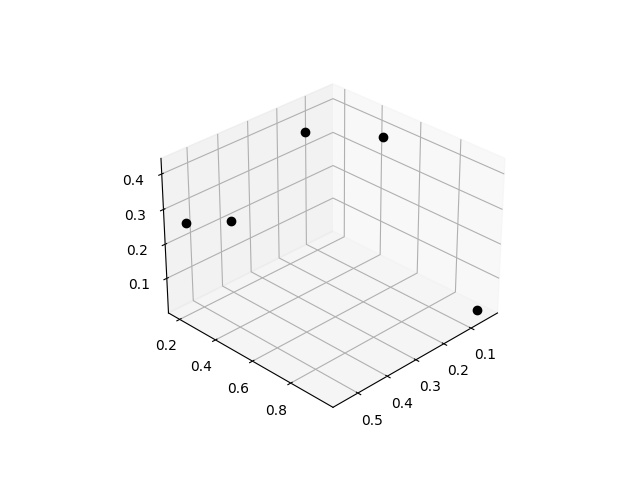

In [29]:

fig,ax = plt.subplots(ncols=1,nrows=1,subplot_kw=dict(projection='3d'))

def dich(num):
	points = np.array([[0.0,0.0,0.0]] * (num))
	print(len(points))
	for i in range(num):
		p = np.random.dirichlet((1,1,1))
		ax.plot(p[0], p[1],p[2], 'ok')
		points[i] = np.array(p)
	ax.view_init(30,45)
	hv = get_performance_indicator("hv", ref_point=np.array([1.001] * 3))
	print("Hypervolume:", round(hv.do(points) * 100, 3), "%")